<div style="padding:30px; 
            color:white;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:white;
            background-color:black;
            font-family:Luminari;
            overflow:hidden;
            font-weight:500">Aircraft Wildlife Strikes 1990-2023</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('STRIKE_REPORTS.csv')

C:\Users\KPMal\AppData\Local\Temp\ipykernel_9952\1840193475.py:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('STRIKE_REPORTS.csv')


In [3]:
df

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288805,1472253,8/28/2023,8,2023,21:50,NaN,ZZZZ,UNKNOWN,NaN,NaN,...,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,11/17/2023,False
288806,1472256,8/28/2023,8,2023,20:40,NaN,ZZZZ,UNKNOWN,NaN,NaN,...,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,11/17/2023,False
288807,1472257,8/28/2023,8,2023,07:14,Dusk,KDTW,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,...,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,11/17/2023,False
288808,1472258,8/28/2023,8,2023,09:00,Day,KPIH,POCATELLO REGIONAL ARPT,42.91131,-112.59586,...,Medium,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,11/17/2023,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

In [5]:
df.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,EMO,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,AOS,BIRD_BAND_NUMBER,NR_INJURIES,NR_FATALITIES
count,2.888100e+05,288810.000000,288810.000000,2.533090e+05,253308.000000,192151.000000,186756.000000,206490.000000,206259.000000,205481.000000,191612.000000,13080.000000,3290.000000,148807.000000,94237.000000,188234.000000,14196.000000,3.900000e+02,276.000000,24.000000
mean,8.736693e+05,7.175974,2011.697798,2.012754e+02,-90.880247,19.755812,8.522377,3.538312,2.013929,2.814956,2.667536,2.900306,2.043161,865.960358,142.585057,0.814466,91.454416,8.811022e+07,1.293478,2.041667
std,2.526448e+05,2.765082,8.432311,8.177522e+04,327.243918,10.724278,12.866405,0.867312,0.420133,2.113806,1.981032,1.950649,1.435114,1843.098801,46.650050,3.547950,661.074472,9.110186e+07,0.756134,1.654484
min,6.082420e+05,1.000000,1990.000000,-3.767333e+01,-177.381000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,6.893202e+05,5.000000,2006.000000,3.298764e+01,-98.469780,10.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000
50%,7.646935e+05,7.000000,2014.000000,3.880581e+01,-87.904460,22.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,0.000000,3.000000,7.897730e+07,1.000000,1.500000
75%,1.064714e+06,9.000000,2019.000000,4.085010e+01,-80.417940,31.000000,10.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000,900.000000,160.000000,0.000000,24.000000,1.893343e+08,1.000000,2.000000
max,1.472259e+06,12.000000,2023.000000,4.115443e+07,164140.000000,92.000000,2301.000000,5.000000,4.000000,7.000000,7.000000,6.000000,5.000000,31300.000000,1250.000000,99.000000,62848.000000,2.821218e+08,7.000000,8.000000


In [6]:
# Dropping duplicate data
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(288810, 100)

In [8]:
# Incidents by year
groupedYr_df = df.groupby('INCIDENT_YEAR').size().reset_index(name='Count')

In [9]:
groupedYr_df

,INCIDENT_YEAR,Count
0,1990,2120
1,1991,2516
2,1992,2651
3,1993,2624
4,1994,2708
5,1995,2825
6,1996,3031
7,1997,3559
8,1998,3809
9,1999,5120


<div style="padding:30px; 
            color:white;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:white;
            background-color:black;
            font-family:Luminari;
            overflow:hidden;
            font-weight:500">Aircarft Wildlife Strikes by Year.</div>

C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='INCIDENT_YEAR', ylabel='Count'>

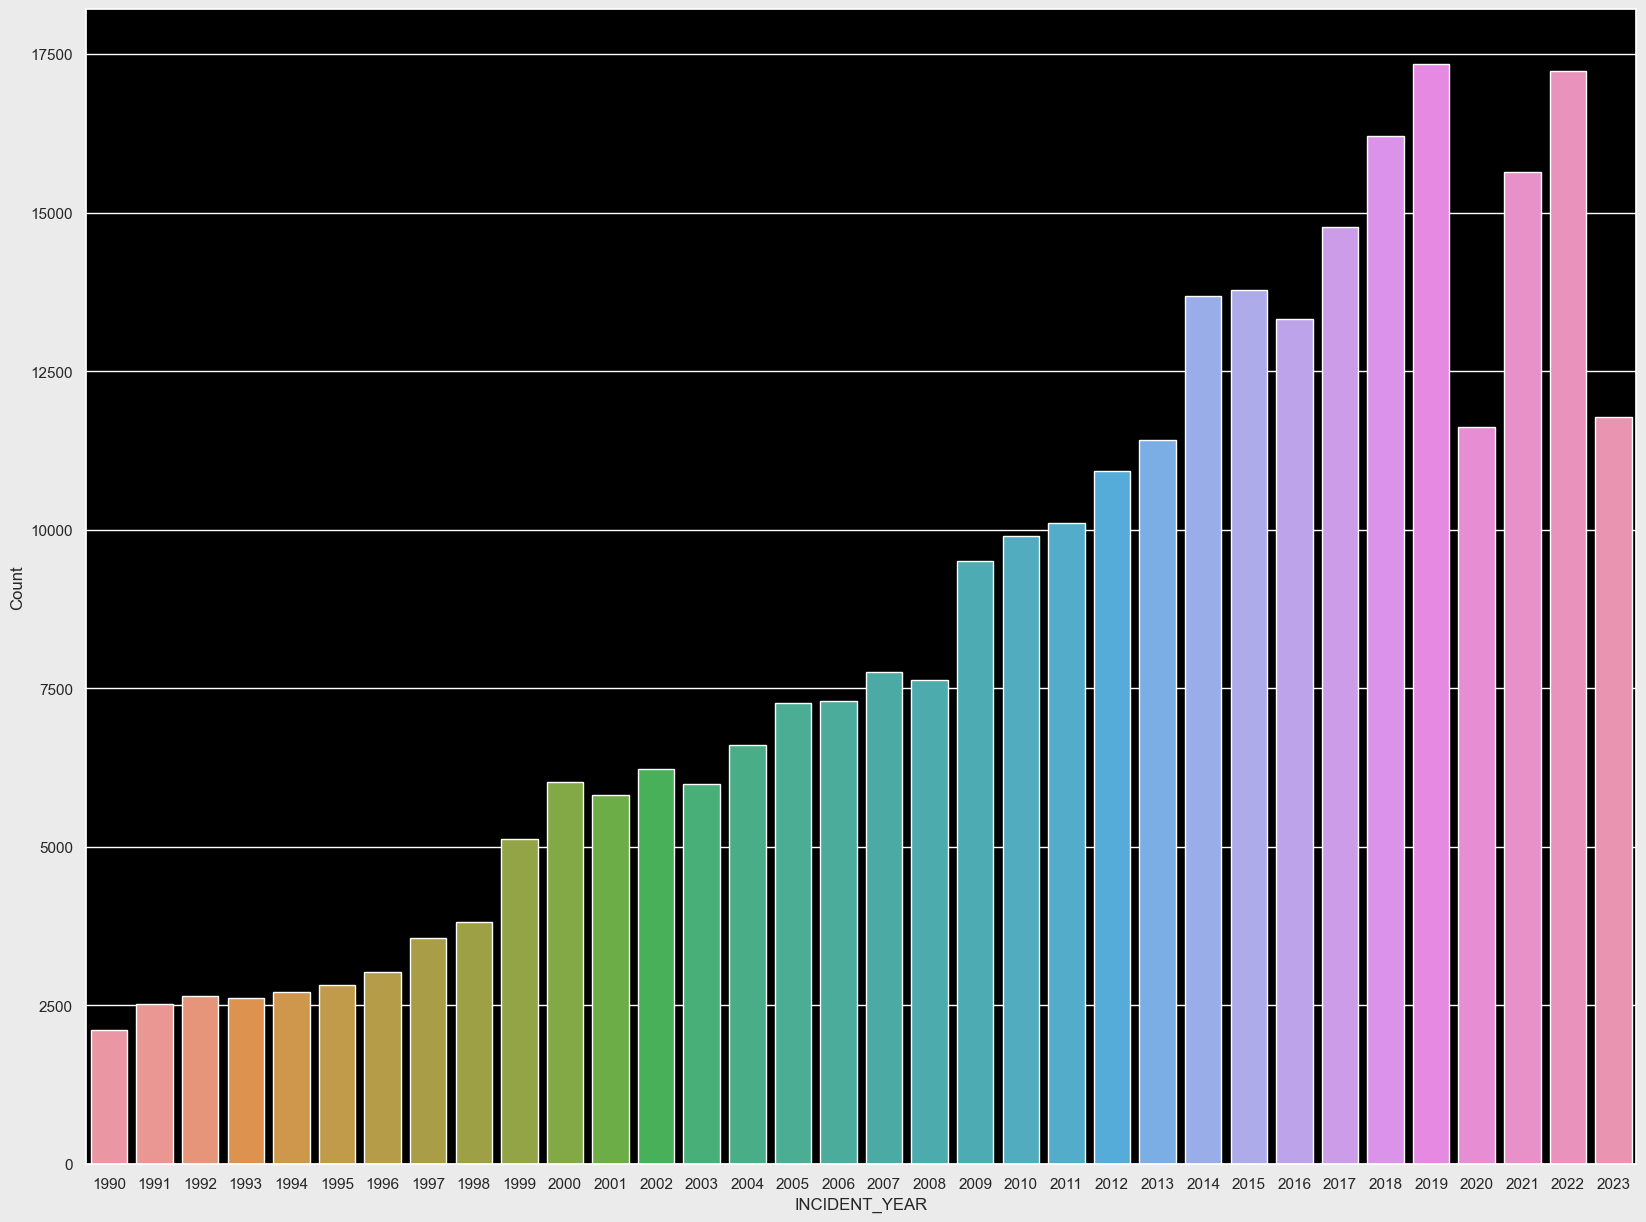

In [10]:
sns.set(rc={'figure.figsize':(20,15)})
#sns.set_style("ticks")
sns.set(rc={'axes.facecolor':'#000000', 'figure.facecolor':'#EBEBEB'})
sns.barplot(groupedYr_df, x="INCIDENT_YEAR", y="Count")
#plt.show(bar_plot)



<div style="padding:30px; 
            color:white;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:white;
            background-color:black;
            font-family:Luminari;
            overflow:hidden;
            font-weight:500">Aircarft Wildlife Strike Fatalities Reported in the U.S. by Month</div>

In [11]:
df['INCIDENT_MONTH'] = df['INCIDENT_MONTH'].astype(str)

In [12]:
df['INCIDENT_MONTH'] = df['INCIDENT_MONTH'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


In [13]:
FatMo = df.groupby(['INCIDENT_MONTH'])['NR_FATALITIES'].sum()

In [16]:
#FatMo.columns

C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\KPMal\anaconda3\envs\Py3-9\l

[Text(0.5, 1.0, 'Number of Reported Fatalities per month')]

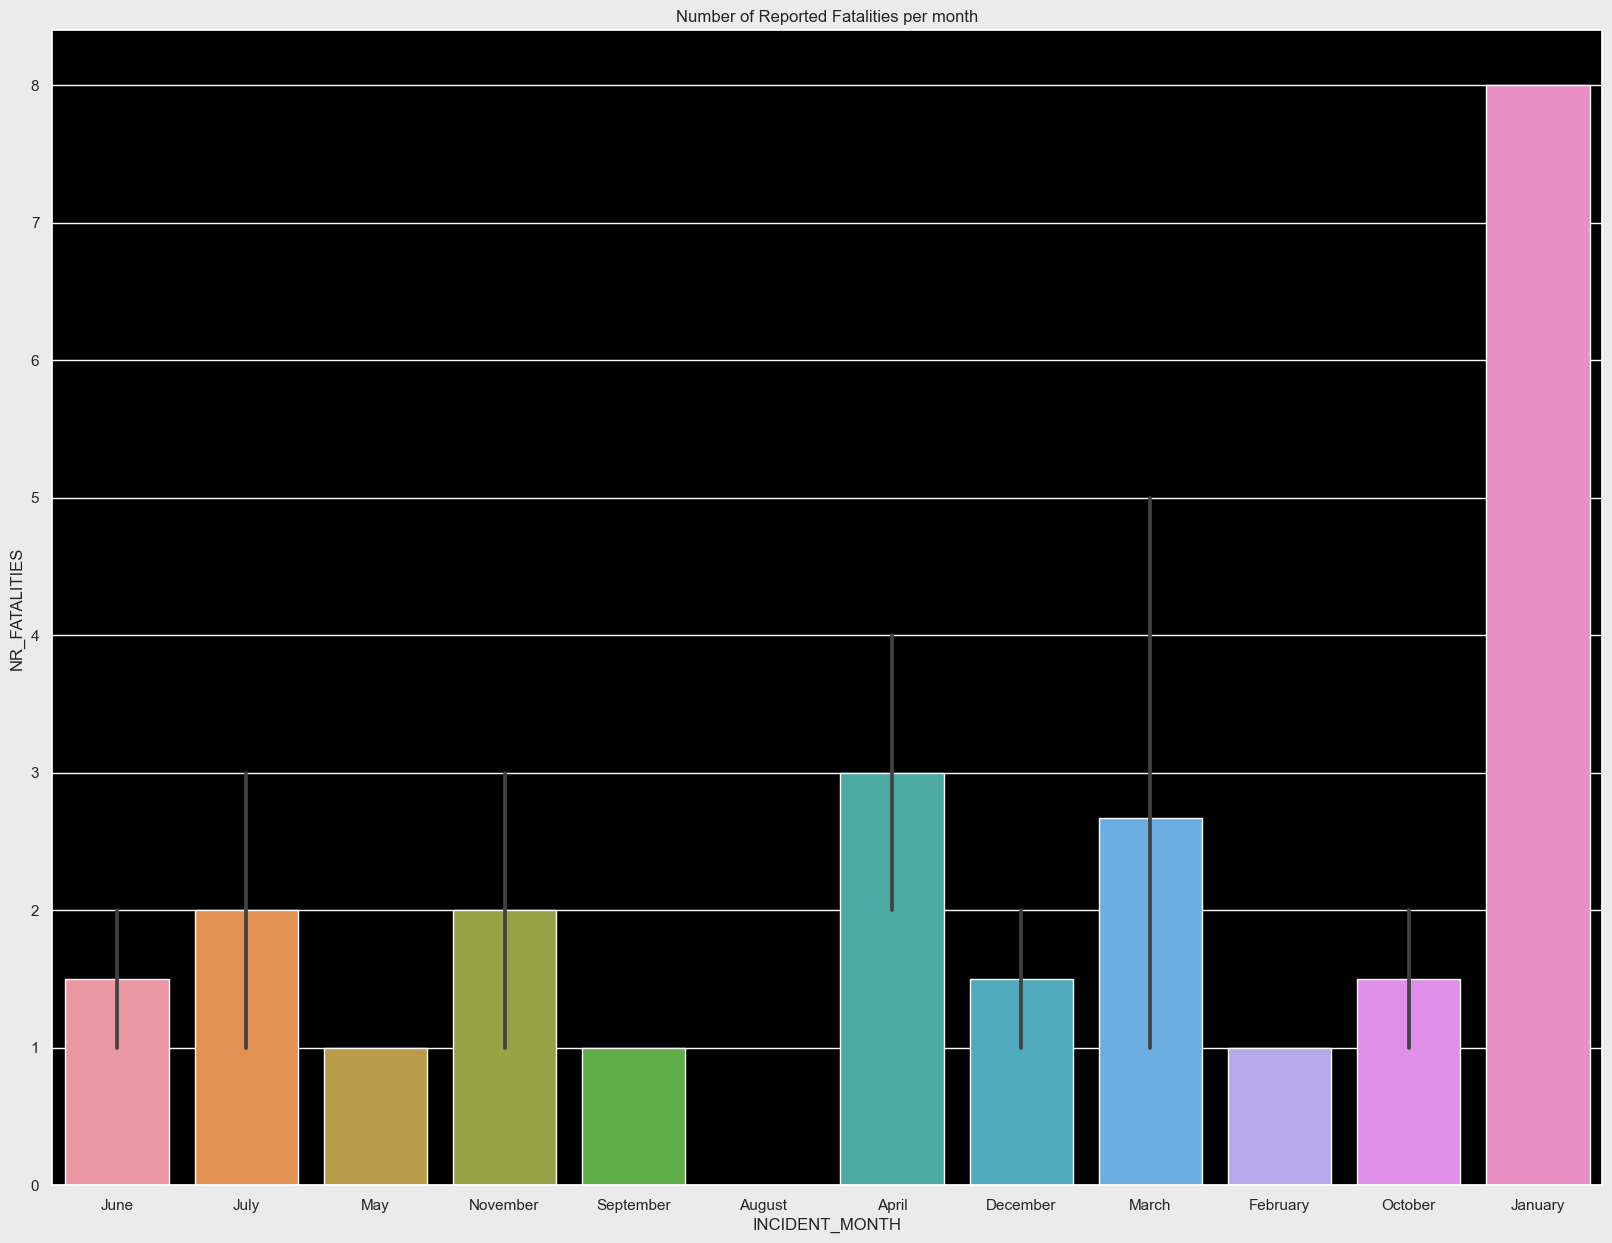

In [15]:
sns.barplot(data=df, x='INCIDENT_MONTH', y='NR_FATALITIES').set(title='Number of Reported Fatalities per month')

In [17]:
df['NR_FATALITIES'].unique()

array([nan,  1.,  2.,  8.,  3.,  4.,  5.])

In [18]:
FatST = df.groupby(['STATE'])['NR_FATALITIES'].sum()

In [19]:
FatST.describe()

count    67.000000
mean      0.179104
std       0.716163
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       5.000000
Name: NR_FATALITIES, dtype: float64

In [20]:
FatST

STATE
AB    0.0
AK    0.0
AL    0.0
AR    0.0
AS    0.0
     ... 
VT    0.0
WA    2.0
WI    0.0
WV    1.0
WY    0.0
Name: NR_FATALITIES, Length: 67, dtype: float64

In [21]:
FatST = FatST.reset_index()

In [22]:
FatST

,STATE,NR_FATALITIES
0,AB,0.0
1,AK,0.0
2,AL,0.0
3,AR,0.0
4,AS,0.0
...,...,...
62,VT,0.0
63,WA,2.0
64,WI,0.0
65,WV,1.0


In [23]:
deadlyST = FatST.nlargest(3, ['NR_FATALITIES'])

In [24]:
deadlyST

,STATE,NR_FATALITIES
46,OK,5.0
59,UT,2.0
63,WA,2.0


<div style="padding:30px; 
            color:white;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:white;
            background-color:black;
            font-family:Luminari;
            overflow:hidden;
            font-weight:500">States with the most fatalities reported</div>

C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'States with the most fatalities reported')]

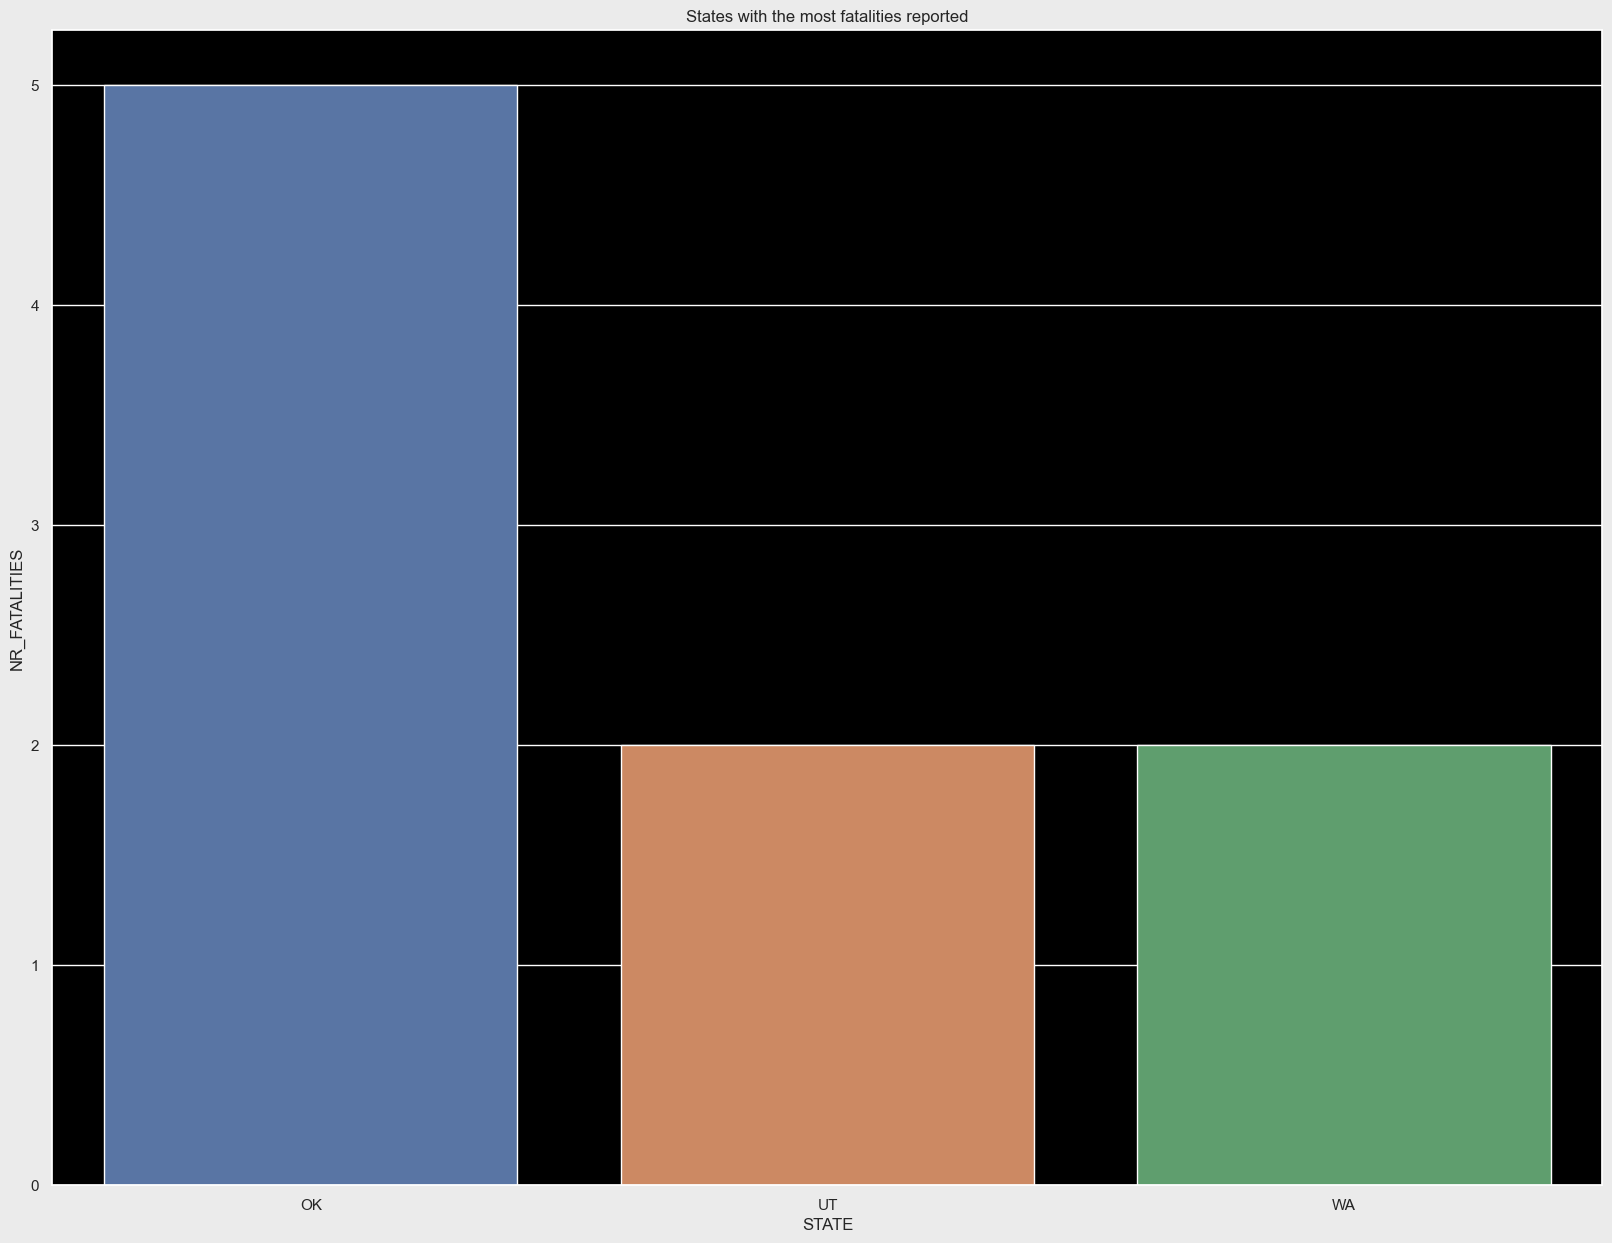

In [25]:
sns.barplot(data=deadlyST, x='STATE', y='NR_FATALITIES').set(title='States with the most fatalities reported')

In [26]:
injST = df.groupby(['STATE'])['NR_INJURIES'].sum()

In [27]:
injST.describe()

count    67.000000
mean      2.865672
std       4.100612
min       0.000000
25%       0.000000
50%       2.000000
75%       3.500000
max      25.000000
Name: NR_INJURIES, dtype: float64

In [28]:
injST

STATE
AB    0.0
AK    0.0
AL    2.0
AR    1.0
AS    0.0
     ... 
VT    0.0
WA    2.0
WI    2.0
WV    2.0
WY    2.0
Name: NR_INJURIES, Length: 67, dtype: float64

In [29]:
injST = injST.reset_index()

In [30]:
injuryST = injST.nlargest(10, ['NR_INJURIES'])

In [31]:
injuryST

,STATE,NR_INJURIES
12,FL,25.0
57,TX,13.0
7,CA,12.0
37,NE,11.0
13,FN,10.0
19,IL,7.0
26,MD,7.0
47,ON,7.0
14,GA,6.0
56,TN,6.0


<div style="padding:30px; 
            color:white;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:white;
            background-color:black;
            font-family:Luminari;
            overflow:hidden;
            font-weight:500">States with the most injuries reported</div>

C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'States with the most fatalities reported')]

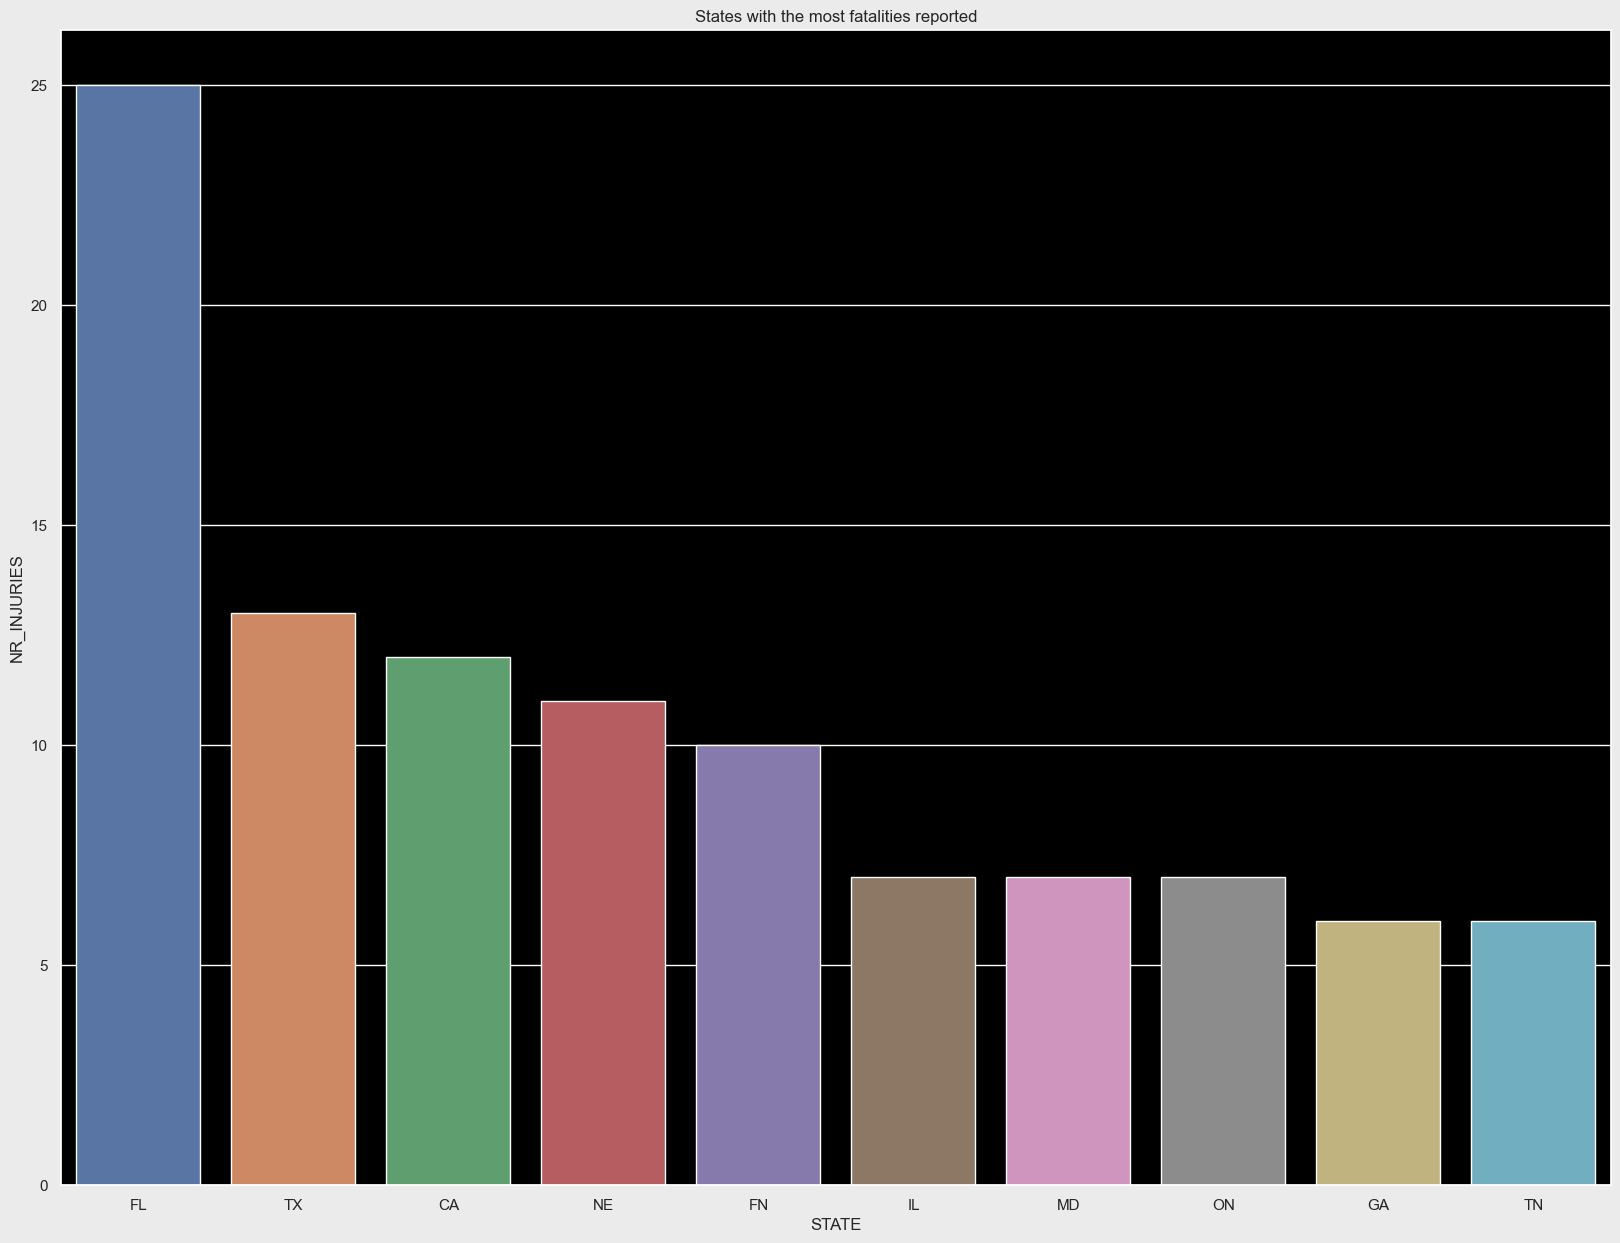

In [32]:
sns.barplot(data=injuryST, x='STATE', y='NR_INJURIES').set(title='States with the most fatalities reported')

In [33]:
df['TIME_OF_DAY'].unique()

array([nan, 'Day', 'Dawn', 'Night', 'Dusk'], dtype=object)

In [34]:
df['TIME_OF_DAY'].value_counts()

TIME_OF_DAY
Day      102548
Night     50446
Dusk       7428
Dawn       5972
Name: count, dtype: int64

In [35]:
df['TIME_OF_DAY'].isna()

0          True
1          True
2          True
3          True
4          True
          ...  
288805     True
288806     True
288807    False
288808    False
288809     True
Name: TIME_OF_DAY, Length: 288810, dtype: bool

In [36]:
df['TIME_OF_DAY'].isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
288805     True
288806     True
288807    False
288808    False
288809     True
Name: TIME_OF_DAY, Length: 288810, dtype: bool

<div style="padding:30px; 
            color:white;
            margin:10px;
            font-size:180%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color:white;
            background-color:black;
            font-family:Luminari;
            overflow:hidden;
            font-weight:500">Injuries reported based on time of day</div>

C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KPMal\anaconda3\envs\Py3-9\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


[Text(0.5, 1.0, 'Injuries reported based on time of day')]

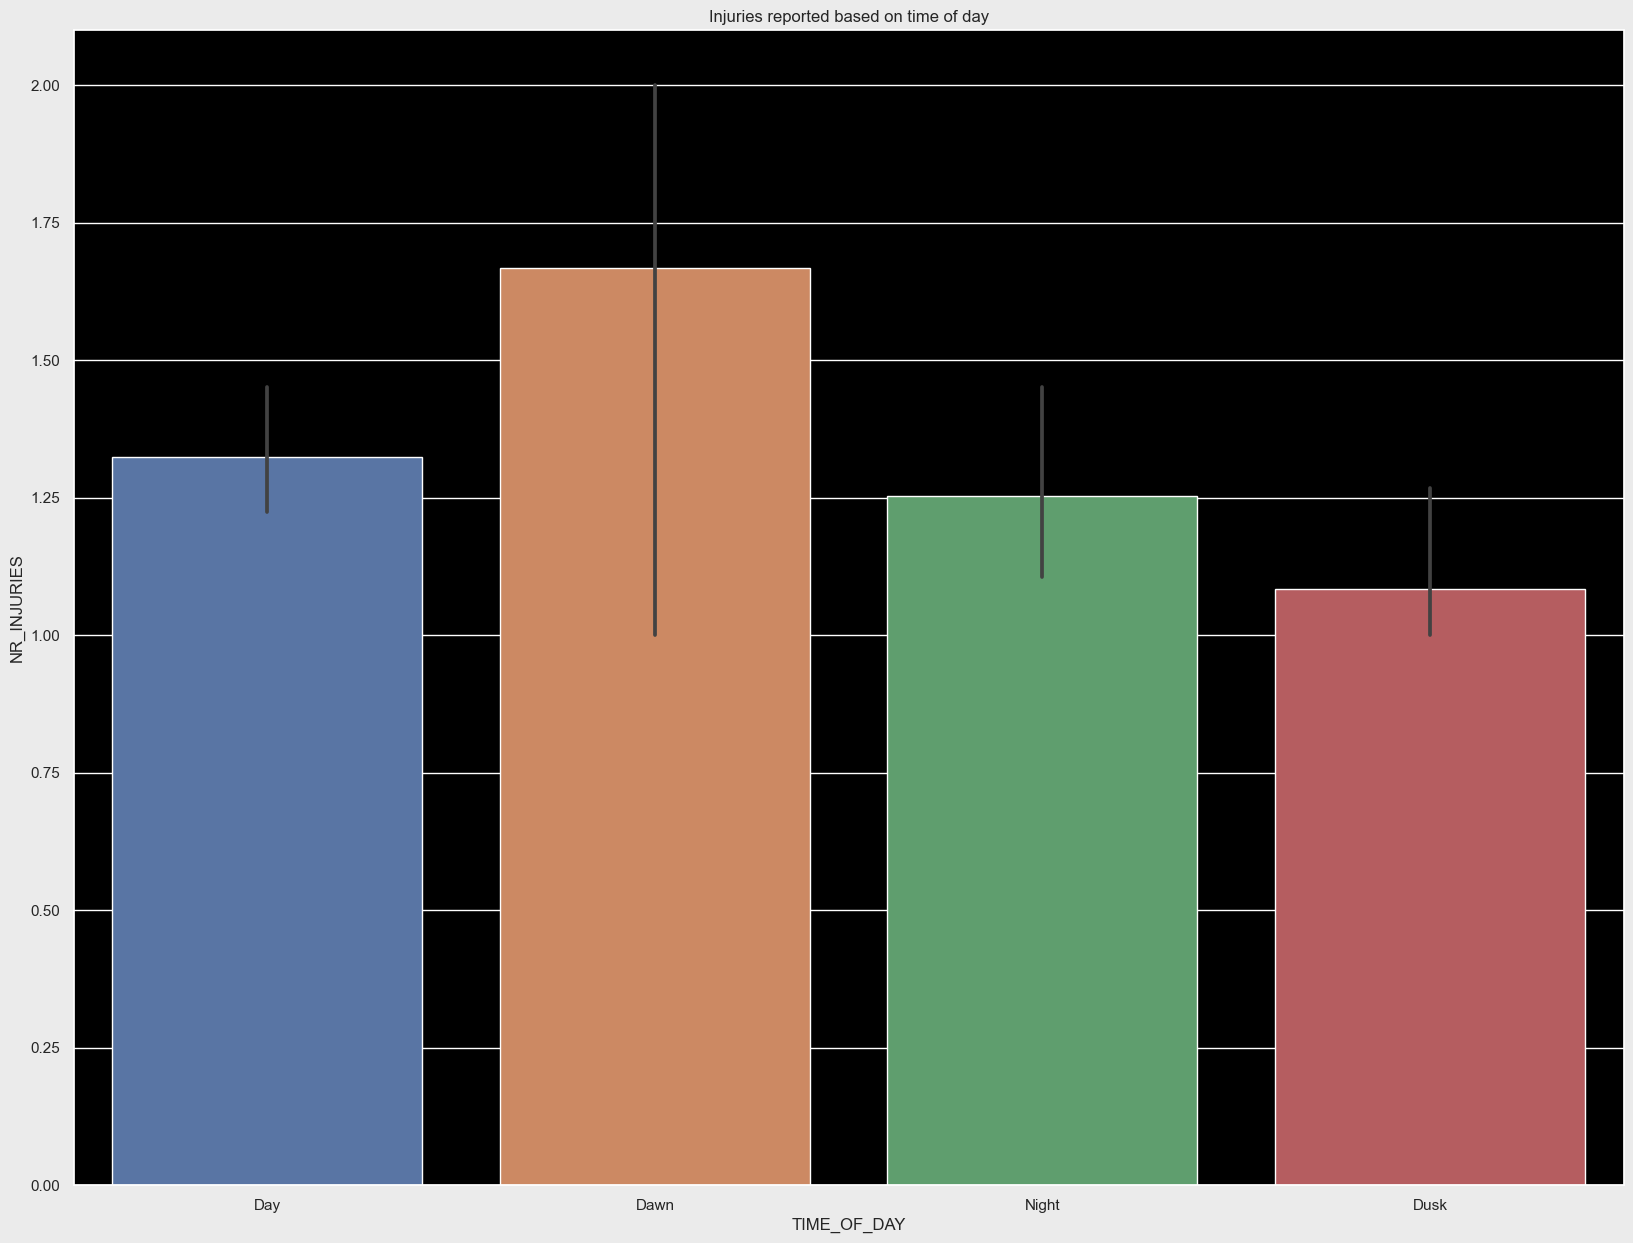

In [37]:
sns.barplot(data=df, x='TIME_OF_DAY', y='NR_INJURIES').set(title='Injuries reported based on time of day')